In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r'./data_clean.csv')

In [18]:
df.head(2)

,username,komentar,clean_comment,stem_comment,tokens,label
0,kompascom,KOREKSI: Dalam infografis tertulis “Periode su...,koreksi infografis tertulis periode survei jul...,koreksi infografis tulis periode survei juli p...,"['koreksi', 'infografis', 'tulis', 'periode', ...",netral
1,noto.aries.3,"Pdip dukung anies aja, agar bisa menang jadi s...",pdip dukung anies aja menang sakit hati pilpre...,pdip dukung anies aja menang sakit hati pilpre...,"['pdip', 'dukung', 'anies', 'aja', 'menang', '...",netral


In [78]:
# Train test split

X = df['clean_comment']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training:", len(X_train))
print("Testing:", len(X_test))

Training: 326
Testing: 82


In [79]:
# Menggunakan TF-IDF untuk vectorisasi teks

vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [80]:
print(round(X_train, 4))

  (0, 112)	0.3486
  (0, 124)	0.3735
  (0, 283)	0.2461
  (0, 378)	0.3735
  (0, 636)	0.3735
  (0, 732)	0.2967
  (0, 775)	0.3735
  (0, 777)	0.3735
  (0, 838)	0.1801
  (1, 14)	0.4307
  (1, 766)	0.9025
  (2, 1)	0.4943
  (2, 42)	0.3154
  (2, 630)	0.5374
  (2, 766)	0.6061
  (3, 42)	0.2937
  (3, 349)	0.6202
  (3, 578)	0.5279
  (3, 630)	0.5005
  (4, 14)	0.2108
  (4, 22)	0.2688
  (4, 109)	0.5199
  (4, 166)	0.3916
  (4, 441)	0.4017
  (4, 513)	0.4853
  :	:
  (321, 509)	0.4952
  (322, 22)	0.2404
  (322, 66)	0.4649
  (322, 77)	0.434
  (322, 317)	0.3502
  (322, 635)	0.3811
  (322, 714)	0.3165
  (322, 790)	0.412
  (323, 14)	0.13
  (323, 46)	0.2022
  (323, 91)	0.6413
  (323, 210)	0.2842
  (323, 221)	0.2724
  (323, 545)	0.3206
  (323, 550)	0.2993
  (323, 595)	0.2842
  (323, 738)	0.3206
  (324, 14)	0.3925
  (324, 42)	0.214
  (324, 318)	0.4289
  (324, 400)	0.4839
  (324, 583)	0.4839
  (324, 811)	0.3845
  (325, 22)	0.5198
  (325, 747)	0.8543


In [81]:
# Mapping dan Normalisasi data labels

df_mapping = {
    'positif':0,
    'negatif':1,
    'netral':2
}

y_train = y_train.map(df_mapping)
y_test = y_test.map(df_mapping)

In [87]:
y_train.value_counts()

label
2    316
0      7
1      3
Name: count, dtype: int64

In [97]:
# Selection models

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC()
}

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predict = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision, Recall, F1 Score
    accuracy[key] = accuracy_score(predict, y_test)
    precision[key] = precision_score(predict, y_test)
    recall[key] = recall_score(predict, y_test)
    f1[key] = f1_score(predict, y_test)


In [98]:
# Menampilkan metriks dari setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

round(df_model, 2)

,Accuracy,Precision,Recall,F1-Score
Naive Bayes,0.99,0.0,0.0,0.0
SVM,0.99,0.0,0.0,0.0


In [105]:
# Evaluasi model

y_pred = models['Naive Bayes'].predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred).round(5))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=['Positif', 'Negatif', 'Netral']))

Akurasi: 0.9878
Laporan Klasifikasi:
               precision    recall  f1-score   support

     Positif       0.00      0.00      0.00         0
     Negatif       0.00      0.00      0.00         1
      Netral       0.99      1.00      0.99        81

   micro avg       0.99      0.99      0.99        82
   macro avg       0.33      0.33      0.33        82
weighted avg       0.98      0.99      0.98        82



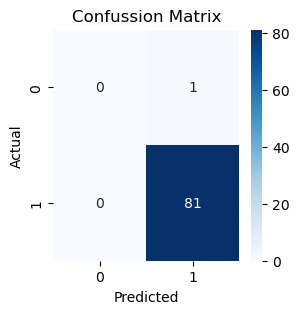

In [93]:
# Confussion Matrix

matrix_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(matrix_rf, annot = True, fmt='d', cmap="Blues")
plt.title('Confussion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()